In [47]:
import requests
import re
import json
import pandas as pd


p1 = re.compile(r'[(](.*?)[)]', re.S)  #最小匹配 小括号

#返回根据data字典的按顺序排列的日期，数据
data_ = {}
def date_value(data, key):
    x = []
    y = []
    for k in sorted(data.keys()):
        x.append(k)
        y.append(data[k])
        
    data_['日期'] = x
    data_[key] = y
    
    return data_

#请求时间
time = '20200217'  #格式20200217

#湖北省市代码
area = {"武汉":"420100", "黄石":"420200","十堰":"420300","宜昌":"420500","襄阳":"420600","鄂州":"420700",
        "荆门":"420800","孝感":"420900","荆州":"421000","黄冈":"421100","咸宁":"421200","随州":"421300",
        "仙桃":"429004","潜江":"429005","天门":"429006", "恩施":"422800", "神农架地区":"429021"}


for key, value in area.items():
    url="http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id={}&date={}".format(value, time)  #构造每个市的请求url
    print(url)
    #你需要爬取的网页
    html=requests.get(url)
    print(html.status_code)
    
    #匹配小括号中括号，并json提取，提取数据字段
    a = re.findall(p1, html.text)[0]
    data = json.loads(a)['data']['list']   #数据
    
    try:
        data_ = date_value(data, key)
    except:
        print(key)
    

df = pd.DataFrame(data_)     #dict 转为 dataframe
df_ = df[df['日期']>='20200101'].reset_index(drop=True)   #选取20200101之后数据

df_.to_excel('data.xls', index=False)
    


http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420100&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420200&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420300&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420500&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420600&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420700&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420800&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=420900&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=421000&date=20200217
200
http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=421100&date=20200217
200
http://huiyan.baidu.com/migration/intern

In [16]:
import requests
import re
import json
import pandas as pd

#迁入
url ="http://huiyan.baidu.com/migration/cityrank.jsonp?dt=city&id=510100&type=move_in&date=20200227"
response=requests.get(url)
print(response.status_code)

p1 = re.compile(r'[(](.*?)[)]', re.S)  #最小匹配 小括号
a = re.findall(p1, response.text)[0]
dataMoveIn = json.loads(a)['data']['list']   #数据

#迁出
url = "http://huiyan.baidu.com/migration/cityrank.jsonp?dt=city&id=510100&type=move_out&date=20200227"
response=requests.get(url)
print(response.status_code)

p1 = re.compile(r'[(](.*?)[)]', re.S)  #最小匹配 小括号
a = re.findall(p1, response.text)[0]
dataMoveOut = json.loads(a)['data']['list']   #数据


#城内出行强度
url = "http://huiyan.baidu.com/migration/internalflowhistory.jsonp?dt=city&id=510100&date=20200228"
response=requests.get(url)
print(response.status_code)

p1 = re.compile(r'[(](.*?)[)]', re.S)  #最小匹配 小括号
a = re.findall(p1, response.text)[0]
dataCity = json.loads(a)['data']['list']   #数据

200
200
200


In [110]:
dataMI = pd.DataFrame(columns=['city_name', 'province_name', 'value'])
for i in dataMoveIn:
    dataMI = dataMI.append(pd.DataFrame({'city_name': [i['city_name']], 'province_name': [i['province_name']], 'value': [i['value']]}))
dataMI = dataMI.reset_index(drop=True)

dataMO = pd.DataFrame(columns=['city_name', 'province_name', 'value'])
for i in dataMoveOut:
    dataMO = dataMO.append(pd.DataFrame({'city_name': [i['city_name']], 'province_name': [i['province_name']], 'value': [i['value']]}))
dataMO = dataMO.reset_index(drop=True)


#返回根据data字典的按顺序排列的日期，数据
dataDic = {}
def date_value(data):
    x = []
    y = []
    for k in sorted(data.keys()):
        x.append(k)
        y.append(data[k])
        
    data_['date'] = x
    data_['value'] = y

    
    return data_

dataDic = date_value(dataCity)
dataC = pd.DataFrame(dataDic)     #dict 转为 dataframe

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

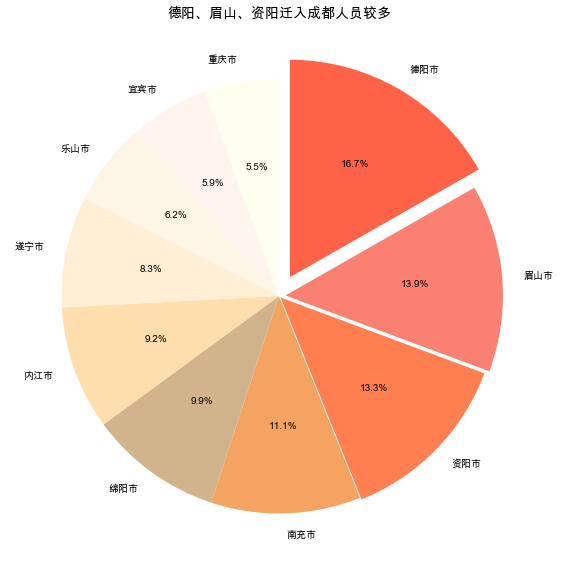

In [87]:
#move in

plt.rcParams['font.sans-serif'] = ['KaiTi'] # windows版解决中文无法显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #mac版解决中文无法显示
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

figure = plt.figure(figsize=(10,10))

explode = [0.1, 0.03, 0.01] + [0] * 7

colors = ['#FF6347', '#FA8072', '#FF7F50', '#F4A460', '#D2B48C', '#FFDEAD', '#FFEFD5', '#FDF5E6', '#FFF5EE', '#FFFFF0']

data = np.array([i for i in dataMI['value'][:10].values]).astype('float')
label = np.array([i for i in dataMI['city_name'][:10].values])

plt.pie(data,labels=label,autopct='%.1f%%',colors=colors, explode=explode, startangle=90,counterclock=False)
plt.title('德阳、眉山、资阳迁入成都人员较多', fontsize=14)
plt.savefig('迁入.png', dpi=300)

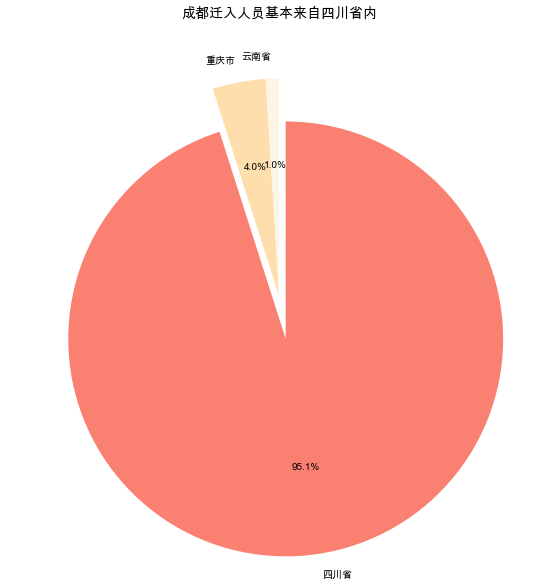

In [167]:
dataMI_province = dataMI.groupby('province_name')['value'].agg('sum').sort_values(ascending=False).reset_index()

figure = plt.figure(figsize=(10,10))

colors = [ '#FA8072', '#FFDEAD', '#FDF5E6']

explode = [0.2, 0, 0]
data = np.array([i for i in dataMI_province['value'][:3].values]).astype('float')
label = np.array([i for i in dataMI_province['province_name'][:3].values])


plt.pie(data,labels=label,autopct='%.1f%%',colors=colors, explode=explode, startangle=90,counterclock=False)
plt.title('成都迁入人员基本来自四川省内', fontsize=14)
plt.savefig('成都迁入人员基本来自四川省内.png', dpi=300)

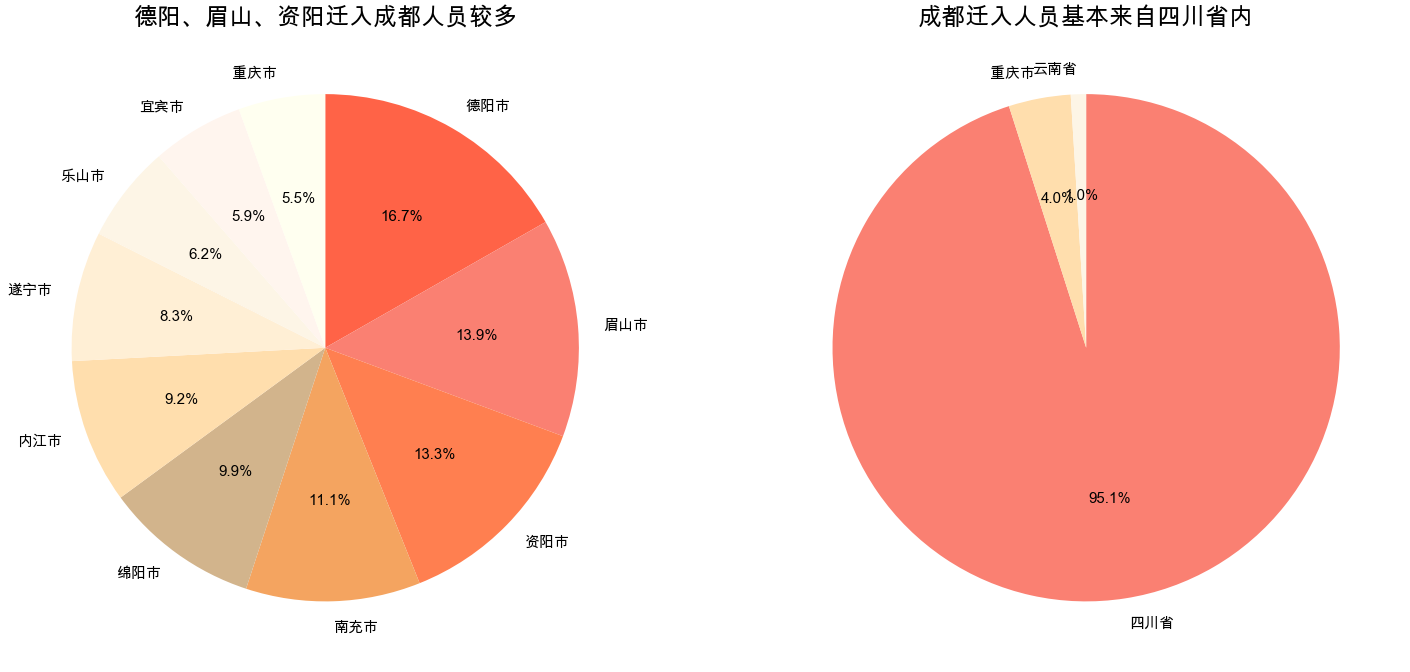

In [187]:
figure = plt.figure(figsize=(25, 15))

axes1 = figure.add_subplot(1, 2, 1)  #总共一行两列，这是第一个图
axes2 = figure.add_subplot(1, 2, 2) #总共一行两列，这是第二个图

colors1 = ['#FF6347', '#FA8072', '#FF7F50', '#F4A460', '#D2B48C', '#FFDEAD', '#FFEFD5', '#FDF5E6', '#FFF5EE', '#FFFFF0']

data1 = np.array([i for i in dataMI['value'][:10].values]).astype('float')
label1 = np.array([i for i in dataMI['city_name'][:10].values])

axes1.pie(data1,labels=label1,autopct='%.1f%%',colors=colors1, startangle=90,counterclock=False,textprops={'fontsize': 15})  #plt改为axes1即可
axes1.set_title('德阳、眉山、资阳迁入成都人员较多', fontsize=24)



########

colors2 = [ '#FA8072', '#FFDEAD', '#FDF5E6']

data2 = np.array([i for i in dataMI_province['value'][:3].values]).astype('float')
label2 = np.array([i for i in dataMI_province['province_name'][:3].values])


axes2.pie(data2,labels=label2,autopct='%.1f%%',colors=colors2, startangle=90,counterclock=False,textprops={'fontsize': 15})
axes2.set_title('成都迁入人员基本来自四川省内', fontsize = 24)

plt.savefig('double.png', dpi=300)

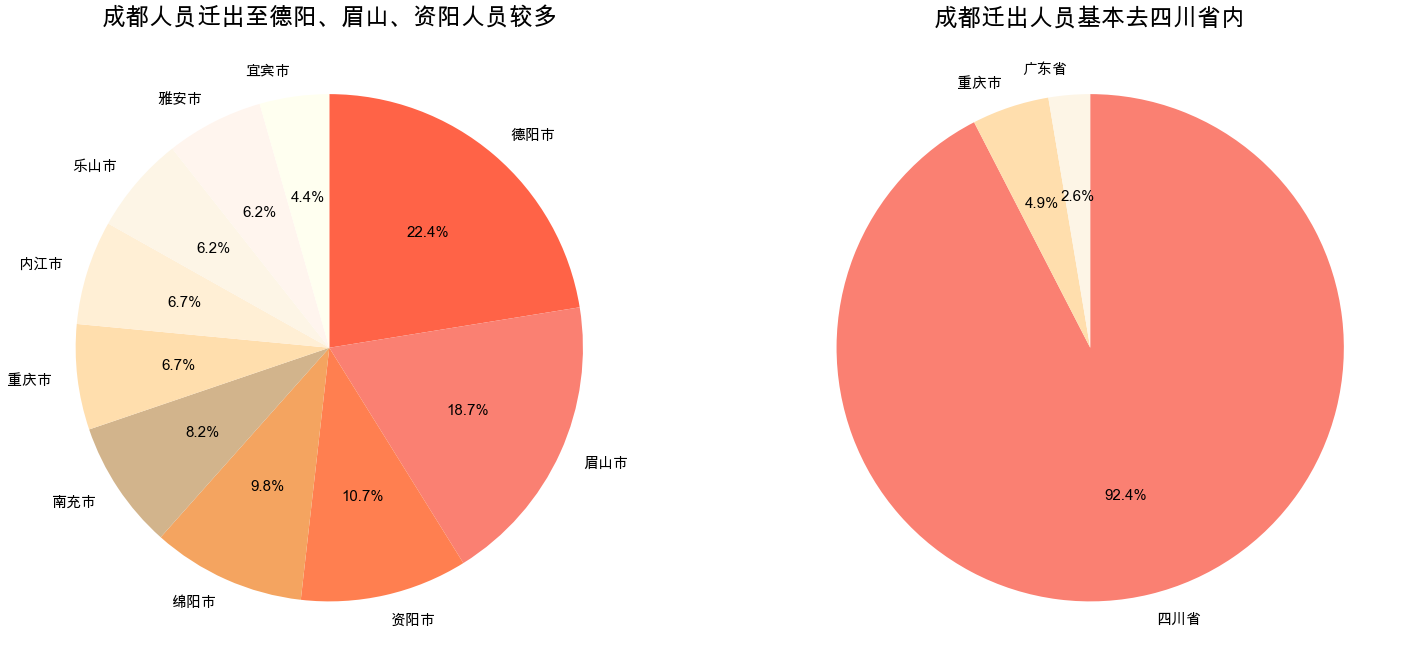

In [188]:
#move out
dataMO_province = dataMO.groupby('province_name')['value'].agg('sum').sort_values(ascending=False).reset_index()

figure = plt.figure(figsize=(25, 20))

axes1 = figure.add_subplot(1, 2, 1)  #总共一行两列，这是第一个图
axes2 = figure.add_subplot(1, 2, 2) #总共一行两列，这是第二个图

colors1 = ['#FF6347', '#FA8072', '#FF7F50', '#F4A460', '#D2B48C', '#FFDEAD', '#FFEFD5', '#FDF5E6', '#FFF5EE', '#FFFFF0']

data1 = np.array([i for i in dataMO['value'][:10].values]).astype('float')
label1 = np.array([i for i in dataMO['city_name'][:10].values])

axes1.pie(data1,labels=label1,autopct='%.1f%%',colors=colors1, startangle=90,counterclock=False,textprops={'fontsize': 15})  #plt改为axes1即可

axes1.set_title('成都人员迁出至德阳、眉山、资阳人员较多', fontsize=24)



########

colors2 = [ '#FA8072', '#FFDEAD', '#FDF5E6']

data2 = np.array([i for i in dataMO_province['value'][:3].values]).astype('float')
label2 = np.array([i for i in dataMO_province['province_name'][:3].values])


axes2.pie(data2,labels=label2,autopct='%.1f%%',colors=colors2, startangle=90,counterclock=False,textprops={'fontsize': 15})

axes2.set_title('成都迁出人员基本去四川省内', fontsize = 24)

plt.savefig('double2.png', dpi=300)

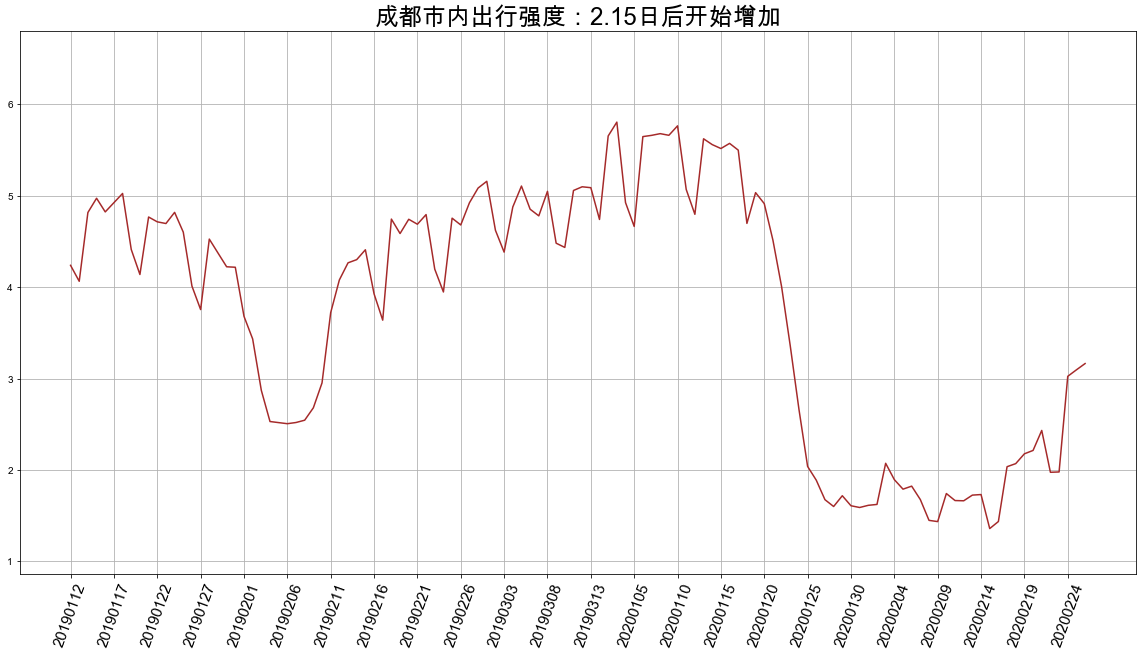

In [189]:

figure = plt.figure(figsize=(20,10))

data = np.array([i for i in dataC['value'].values]).astype('float')
label = np.array([i for i in dataC['date'].values])

num = len(data)  
color = '#A52A2A'
plt.plot(range(num), data, color=color)  #采用对x，y分别用（维度，值）方法画图，可以任意对x，y坐标进行操作，自由度更高

plt.xticks(range(0, num, 5), label[::5], rotation=70, fontsize=15)  # 这里传入的x就是x轴的列表，间隔为5显示坐标防止过于密集，旋转70度
plt.ylim(min(data)-0.5, max(data) + 1.0)  #设置坐标区间
plt.grid() #显示网格


plt.title('成都市内出行强度：2.15日后开始增加', fontsize=24)
plt.savefig('city.png', dpi=300)